# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 


< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data = pd.read_csv("assignment2_data.csv")
data.head()
#data2=[(data['Seats']>=2) & (data['Seats']<=8)]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#data['discount']={data['New_Price']/data['Price']}*100

##회귀분석 및 회귀진단

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


변수 타입 설정

단위를 제거해 수치형 변수로 변경

'Mileage','Power''Power'

In [6]:
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
data['Engine'] = data['Engine'].str.replace(" CC","")

data['Power'] = data['Power'].str.replace(" bhp","")
data['Power'] = data['Power'].apply(lambda x: None if x == "null" else x)
data['Power'] = data['Power'].apply(lambda x: None if x == "" else x)

data['Mileage'] = pd.to_numeric(data['Mileage'])
data['Engine'] = pd.to_numeric(data['Engine'])
data['Power'] = pd.to_numeric(data['Power'])
data["Company"] = data["Name"].str.split().str[0]
#data['Model'] = data["Name"].map(lambda x :" ".join(x.split()[1:]))
data.drop('Name', inplace = True, axis=1)

결측치 처 

NaN이 눈에 띄게 많은 New_Price제거

In [7]:
data.drop('New_Price', inplace = True, axis=1)

In [8]:
data[data['Engine'].isnull()]

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
194,194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
733,733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
2074,2074,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15,Maruti
2096,2096,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93,Hyundai


In [9]:
data[data['Power'].isnull()]

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
76,76,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00,Ford
79,79,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.30,Hyundai
89,89,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10,Hyundai
120,120,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85,Hyundai
143,143,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20,Hyundai
5893,5893,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,NaN,1.75,Maruti
5925,5925,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85,Skoda
5943,5943,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,NaN,6.0,1.70,Mahindra


In [10]:
data[data['Seats'].isnull()]

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
194,194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
229,229,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,3.60,Ford
733,733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
1917,1917,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,1.70,Honda


확인 결과 Power를 제외한 Seats나 Engine값이 null이면 셋 다 null인 경우가 많으므로 해당 변수가 결측치이면 행 삭제

In [11]:
data = data.dropna(subset=['Engine'])
data = data.dropna(subset=['Seats'])

Power의 값은 회사별 평균으로 계산하여 결측치 처리

In [12]:
data = data.groupby('Company').apply(lambda x: x.fillna(x.mean()))

In [13]:
data=data.dropna()

##회귀분석&회귀진단

범주형 변수: Location, Year, Fuel_Type, Transmission, Owner_Type, Seats, Company, Model

수치형 변수: Kilometers_Driven, Mileage, Engine, Power

Target 변수: Price

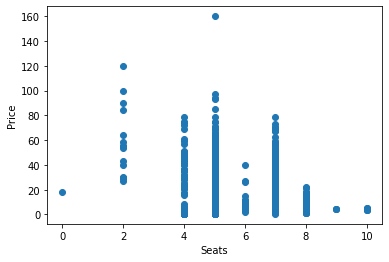

In [14]:
plt.scatter(data['Seats'],data['Price'])
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()
##기본 베이스를 만드는 용도로 사용
#의자는 2개 이상 8개 이하일 때가 주이므로 2개 이상의 데이터만 남겨줌.
data['Seats'] = data['Seats'].apply(lambda x: np.nan if x==0 else x)


밀도 플롯을 그려 정규분포의 형태인지 확인

Text(0.5, 1.0, 'Price')

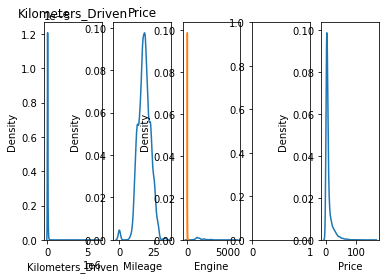

In [15]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5)

sns.kdeplot(data['Kilometers_Driven'], ax=ax1)
ax1.set_title('Kilometers_Driven')

sns.kdeplot(data['Mileage'], ax=ax2)
ax2.set_title('Mileage')

sns.kdeplot(data['Engine'], ax=ax3)
ax2.set_title('Engine')

sns.kdeplot(data['Price'], ax=ax3)
ax2.set_title('Price')

sns.kdeplot(data['Price'], ax=ax5)
ax2.set_title('Price')

In [16]:
#Mileage제외 skewd
data['log_price'] = np.log(data['Price'])
data.drop('Price', inplace = True, axis=1)
data['log_Kilometers_Driven'] = np.log(data['Kilometers_Driven'])
data.drop('Kilometers_Driven', inplace = True, axis=1)
data['log_Engine'] = np.log(data['Engine'])
data.drop('Engine', inplace = True, axis=1)
data['log_Power'] = np.log(data['Power'])
data.drop('Power', inplace = True, axis=1)


##범주형 변수 더미로 변환
앞에 C를 붙여 처리하는 방법도 있음.

In [17]:
Fuel_dummy = pd.get_dummies(data['Fuel_Type'], prefix='Fuel', drop_first=True)
Transmission_dummy = pd.get_dummies(data['Transmission'], prefix='Transmission', drop_first=True)
Owner_dummy = pd.get_dummies(data['Owner_Type'], prefix='Owner', drop_first=True)
Year_dummy = pd.get_dummies(data['Year'], prefix='Year', drop_first=True)
Seat_dummy = pd.get_dummies(data['Seats'], prefix='Seat', drop_first=True)
Company_dummy = pd.get_dummies(data['Company'], prefix='Company', drop_first=True)

In [18]:
data = pd.concat([data, Fuel_dummy, Transmission_dummy, Owner_dummy, Year_dummy, Seat_dummy, Company_dummy],axis=1)

In [19]:
data = data.drop(['Location','Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Seats', 'Company'], axis=1)

In [20]:
num_feature = ['log_Kilometers_Driven', 'Mileage', 'log_Engine', 'log_Power', 'log_price']

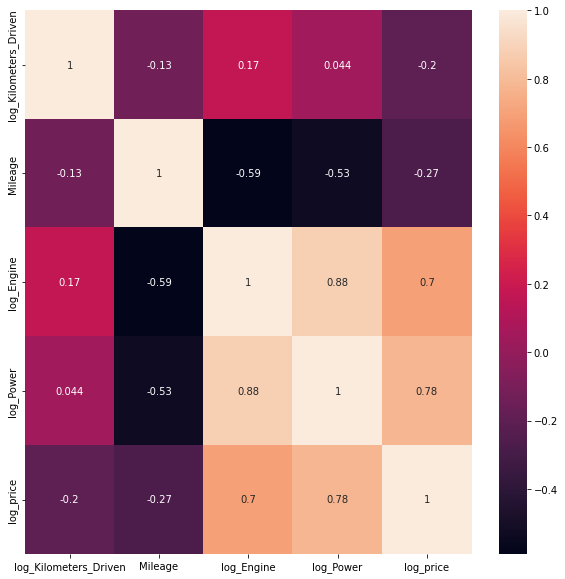

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data = data[num_feature].corr(), annot=True)

In [43]:
from sklearn.model_selection import train_test_split
# 데이터를 train과 test로 분리
target = data["log_price"]
feature = data.drop(['log_price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

Engine,Power,Price간의 강한 상관관계

In [44]:
import matplotlib.pyplot as plt

OLS(먼저,독립변수 추출을 위해 수치형 변수간 상관관계 확인)

In [45]:
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

In [46]:

model=sm.OLS(target,feature)
result = model.fit()
result.summary()
#R-squared(결정계수)가 0.986으로 1에 가까우므로 해당 회귀모델이 설명할 수 있는 데이터의 비율이 크다.
#F-statistics가 5852.으로 F통계량으로 도출된 회귀식이 적절함.
#P_value(독립변수들의 유의 확률)0.05보다 작아야 유의미함.->모두 0.05보다 작으므로 유의미

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              5852.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                        0.00
Time:                        16:11:23   Log-Likelihood:                          9.9242
No. Observations:                5976   AIC:                                      120.2
Df Residuals:                    5906   BIC:                                      588.8
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Unnamed: 0              8.39e-07   1.82e-06      0.461      0.645   -2.73e-06    4.41e-06
Mileage                  -0.0120      0.001     -9.833      0.000      -0.014      -0.010
log_Kilometers_Driven    -0.0492      0.006     -8.428      0.000      -0.061      -0.038
log_Engine                0.1551      0.028      5.637      0.000       0.101       0.209
log_Power                 0.7809      0.023     34.687      0.000       0.737       0.825
Fuel_Diesel               0.1538      0.034      4.580      0.000       0.088       0.220
Fuel_Electric             1.4721      0.179      8.216      0.000       1.121       1.823
Fuel_LPG                  0.0557      0.084      0.664      0.507      -0.109       0.220
Fuel_Petrol              -0.0862      0.034     -2.555      0.011      -0.152      -0.020
Transmission_Manual      -0.1228      0.011    -11.667      0.000      -0.143      -0.102
Owner_Fourth & Above      0.0138      0.088      0.158      0.875      -0.158       0.186
Owner_Second             -0.0512      0.009     -5.580      0.000      -0.069      -0.033
Owner_Third              -0.1421      0.025     -5.690      0.000      -0.191      -0.093
Year_1999                -0.3398      0.207     -1.643      0.100      -0.745       0.066
Year_2000                -0.0862      0.169     -0.510      0.610      -0.417       0.245
Year_2001                -0.4465      0.148     -3.022      0.003      -0.736      -0.157
Year_2002                -0.1446      0.132     -1.096      0.273      -0.403       0.114
Year_2003                -0.2535      0.128     -1.980      0.048      -0.504      -0.003
Year_2004                -0.0368      0.124     -0.298      0.766      -0.279       0.206
Year_2005                -0.1246      0.120     -1.041      0.298      -0.359       0.110
Year_2006                 0.2049      0.119      1.727      0.084      -0.028       0.438
Year_2007                 0.3406      0.117      2.905      0.004       0.111       0.570
Year_2008                 0.4007      0.117      3.426      0.001       0.171       0.630
Year_2009                 0.5107      0.117      4.380      0.000       0.282       0.739
Year_2010                 0.6379      0.116      5.494      0.000       0.410       0.866
Year_2011                 0.7586      0.116      6.545      0.000       0.531       0.986
Year_2012                 0.9093      0.116      7.856      0.000       0.682       1.136
Year_2013                 1.0279      0.116      8.884      0.000       0.801       1.255
Year_2014                 1.1530      0.116      9.970      0.000       0.926       1.380
Year_2015                 1.2822      0.116     11.080      0.000       1.055       1.509
Year_2016     

##Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred_train = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)

In [48]:
intercept = lr.intercept_
coef = lr.coef_


In [52]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('Linear Regression train R-squared: ',lr.score(x_train, y_train))
print('Linear Regression test R-squared : ',lr.score(x_test, y_test))
# MSE
print('Linear Regression train MSE      : ',mean_squared_error(y_train, lr_pred_train))
print('Linear Regression test MSE       : ',mean_squared_error(y_test, lr_pred_test))

Linear Regression train R-squared:  0.922919870626777
Linear Regression test R-squared :  0.9313287195540788
Linear Regression train MSE      :  0.05851225484394634
Linear Regression test MSE       :  0.05269222978319093


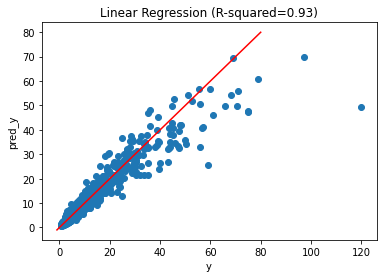

In [54]:
plt.scatter(np.exp(y_test), np.exp(lr_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Linear Regression (R-squared=0.93)')
plt.show()

##Ridge Regression


In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10) # 10만큼의 규제적용 클수록 규제를 가하는 정도가 강해짐
ridge.fit(x_train, y_train)
ridge_pred_train = ridge.predict(x_train)
ridge_pred_test = ridge.predict(x_test)

In [56]:
intercept = ridge.intercept_
coef = ridge.coef_

In [58]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('Ridge train R-squared: ',ridge.score(x_train, y_train))
print('Ridge test R-squared : ',ridge.score(x_test, y_test))
# MSE
print('Ridge train MSE      : ',mean_squared_error(y_train, ridge_pred_train))
print('Ridge test MSE       : ',mean_squared_error(y_test, ridge_pred_test))

Ridge train R-squared:  0.9145501734840489
Ridge test R-squared :  0.9199548387000566
Ridge train MSE      :  0.06486577106355056
Ridge test MSE       :  0.061419533826381684


##Lasso

In [60]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)
lasso_pred_train = lasso.predict(x_train)
lasso_pred_test = lasso.predict(x_test)

In [61]:
intercept = lasso.intercept_
coef = lasso.coef_

In [63]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('Ridge train R-squared: ',ridge.score(x_train, y_train))
print('Ridge test R-squared : ',ridge.score(x_test, y_test))
# MSE
print('Ridge train MSE      : ',mean_squared_error(y_train, ridge_pred_train))
print('Ridge test MSE       : ',mean_squared_error(y_test, ridge_pred_test))

Ridge train R-squared:  0.9145501734840489
Ridge test R-squared :  0.9199548387000566
Ridge train MSE      :  0.06486577106355056
Ridge test MSE       :  0.061419533826381684


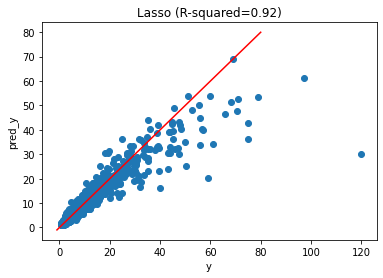

In [64]:
plt.scatter(np.exp(y_test), np.exp(lasso_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Lasso (R-squared=0.92)')
plt.show()

##ElasticNet

In [66]:
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticNet.fit(x_train, y_train)
elasticNet_pred_train = elasticNet.predict(x_train)
elasticNet_pred_test = elasticNet.predict(x_test)

In [67]:
intercept = elasticNet.intercept_
coef = elasticNet.coef_

In [68]:
from sklearn.metrics import mean_squared_error # MSE
# R-squared
print('ElasticNet train R-squared: ',elasticNet.score(x_train, y_train))
print('ElasticNet test R-squared : ',elasticNet.score(x_test, y_test))
# MSE
print('ElasticNet train MSE      : ',mean_squared_error(y_train, elasticNet_pred_train))
print('ElasticNet test MSE       : ',mean_squared_error(y_test, elasticNet_pred_test))

ElasticNet train R-squared:  0.8538565469921336
ElasticNet test R-squared :  0.855009474469949
ElasticNet train MSE      :  0.11093887666905235
ElasticNet test MSE       :  0.11125282706256617


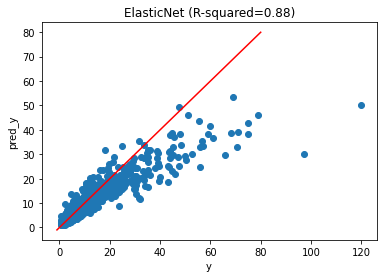

In [69]:
plt.scatter(np.exp(y_test), np.exp(elasticNet_pred_test))
plt.plot([-1, 80], [-1, 80], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('ElasticNet (R-squared=0.88)')
plt.show()

##잔차분석

##모형의 선형성
예측값과 잔차 비교
빨간 실선 잔차의 추세

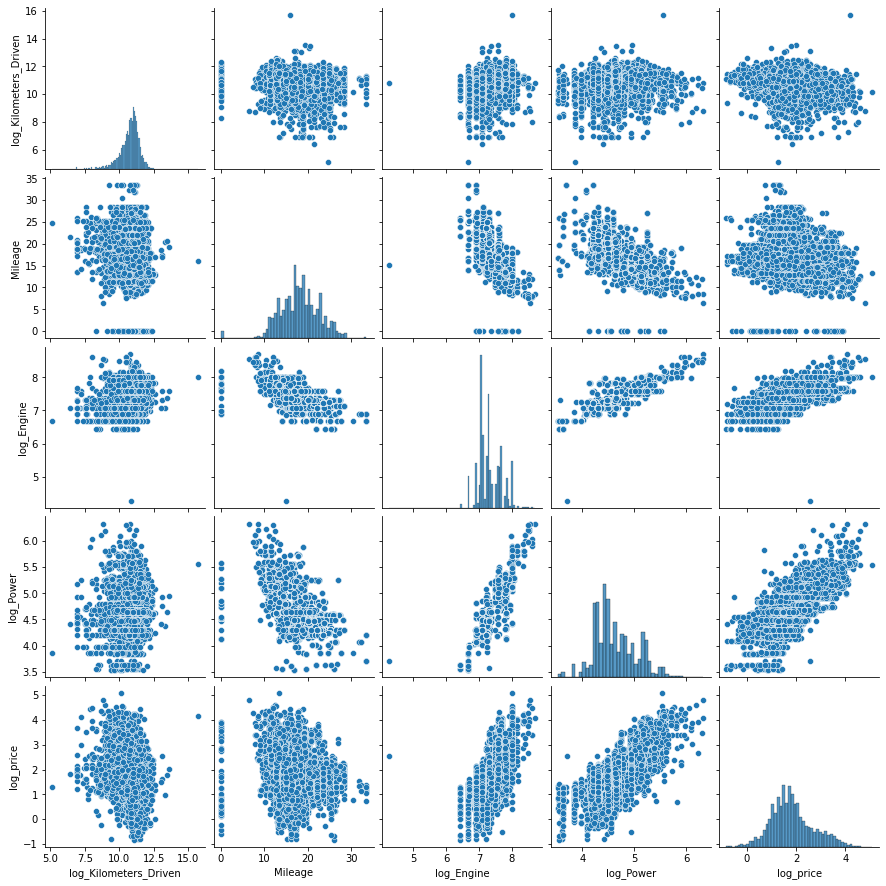

In [73]:
sns.pairplot(data[num_feature])

##잔차의 정규성
잔차가 정규분포를 따른다는 가정을 듯함
Q-Q plot으로 확인 가능


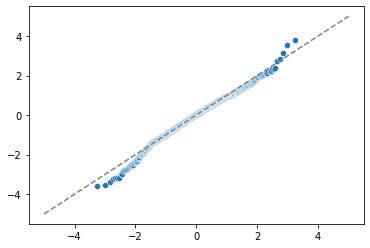

In [79]:
import scipy.stats

# 잔차 = 실제값 - 예측값 
residual = y_test - lr_pred_test

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-5, 5], [-5, 5], '--', color='grey')



##잔차의 등분산성 
모든 값들에 대하여 잔차의 분산이 동일하다는 가정
예측값(X축)에 따라 잔차가 어떻게 달라지는 지 보여줌.
빨간색 실선이 수평선에 가까울 수록 등분산성이 있다는 것

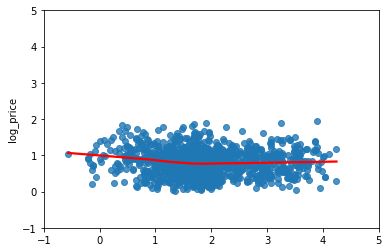

In [84]:
sns.regplot(lr_pred_test,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})
plt.xlim(-1,5)
#의미는?x축 y축 모두 -1~5까지로 표현
plt.ylim(-1,5)
plt.show()

##잔차의 독립성
result_summary의 더빈왓슨,DW검정으로 확인
DW검정은 잔차의 독립성 확인 가능
0-잔차들 사이 양의 자기상관관계
2-독립성
4-잔차들 사이 음의 자기상관관계
자기상관관계가 있을 시, t값,F값,R제곱을 실젭다 증가시켜 실제로 유의미하지 않은 결과를 유의미한 결과로 왜곡
보통 1.5-2.5사이면 독립으로 판단

##다중 공선성


In [86]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
model = ols('log_price ~ log_Kilometers_Driven + Mileage + log_Engine + log_Power', data[num_feature])

res = model.fit()

pd.DataFrame({'feature': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')
#VIR가 모두 10이내이므로 다중공선성이 없음.

,feature,VIF
0,log_Kilometers_Driven,1.092869
1,Mileage,1.537959
2,log_Engine,5.310140
3,log_Power,4.749498
